{'n_frames': 146, 'time': [1715906608.8547916, 1715906609.1747396, 1715906609.3207877, 1715906609.4856353, 1715906609.646035, 1715906609.8241954, 1715906610.1270206, 1715906610.2994492, 1715906610.5060308, 1715906610.67041, 1715906610.8298202, 1715906610.9972954, 1715906611.1751578, 1715906611.3421378, 1715906611.4925354, 1715906612.1882951, 1715906617.7521188, 1715906619.719984, 1715906619.8988078, 1715906620.164297, 1715906630.1857522, 1715906630.2892213, 1715906630.6183712, 1715906630.8745725, 1715906631.0232863, 1715906631.1891518, 1715906631.4578748, 1715906631.6316135, 1715906631.7944837, 1715906631.9749494, 1715906632.1249914, 1715906632.3026018, 1715906632.4604406, 1715906632.627591, 1715906632.7821317, 1715906632.9458203, 1715906633.1154683, 1715906633.2684553, 1715906633.432258, 1715906633.608861, 1715906633.7635005, 1715906633.9333591, 1715906634.116328], 'n_success': 43, 'n_fail': 146, 'distance_vec': [69.42106184614624, 69.54961936808355, 69.54961936808355, 69.806734411958

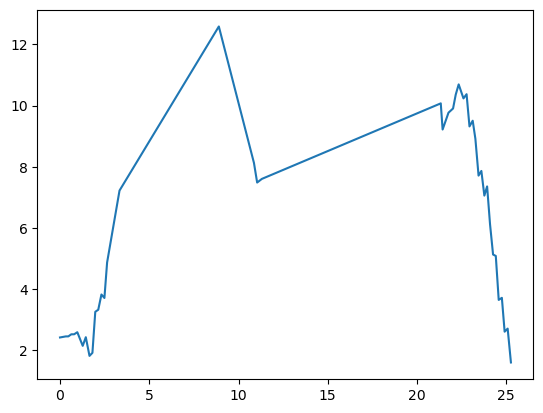

In [111]:
# open a picke file and print the content
import pickle
import sys
import numpy as np

path = f'/home/amir/Documents/Robotics Project/Experiments/Exp5/'

filename = path + 'eval_1243.pkl'

with open(filename, "rb") as f:
    data = pickle.load(f)

print(data)

time = np.array(data['time'])
time = time - time[0]
vel = data['velocity']
ang = data['angular_velocity']

import matplotlib.pyplot as plt
plt.plot(time, vel)

print(data['total_distance_travelled']*4)

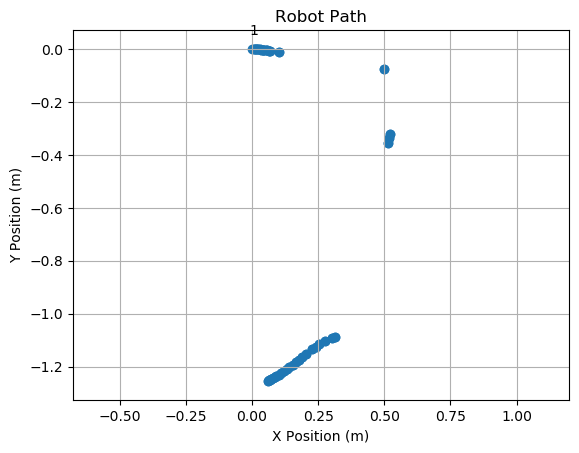

In [112]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Sample data
# Time vector (in seconds)

# Linear velocity vector (in meters per second)
linear_velocity = np.array(vel)

# Angular velocity vector (in radians per second)
angular_velocity = np.array(ang) * math.pi / 4


# Linear velocity vector (in centimeters per second)

# Convert linear velocity to meters per second
linear_velocity = linear_velocity / 100
# Initial position and orientation
x = [0]
y = [0]
theta = [0]

# Time step
dt = np.diff(time)

# Calculate the path
for i in range(1, len(time)):
    # Update orientation
    theta.append(theta[i-1] + angular_velocity[i-1] * dt[i-1])
    
    # Update position
    x.append(x[i-1] + linear_velocity[i-1] * np.cos(theta[i-1]) * dt[i-1])
    y.append(y[i-1] + linear_velocity[i-1] * np.sin(theta[i-1]) * dt[i-1])

# Plot the path
# plt.figure()
# plt.plot(x, y, marker='o')
# plt.title('Robot Path')
# plt.xlabel('X Position (m)')
# plt.ylabel('Y Position (m)')
# plt.grid(True)
# plt.axis('equal')
# plt.show()

for i in range(1, len(time)):
    # Update orientation
    theta.append(theta[i-1] + angular_velocity[i-1] * dt[i-1])
    
    # Update position
    x.append(x[i-1] + linear_velocity[i-1] * np.cos(theta[i-1]) * dt[i-1])
    y.append(y[i-1] + linear_velocity[i-1] * np.sin(theta[i-1]) * dt[i-1])

# Plot the path
plt.figure()
plt.scatter(x, y, marker='o')
plt.title('Robot Path')
plt.xlabel('X Position (m)')
plt.ylabel('Y Position (m)')
plt.grid(True)
plt.axis('equal')

# Annotate each point with the step number
for i in [1]:
    plt.annotate(str(i), (x[i], y[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()
